In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TimePass

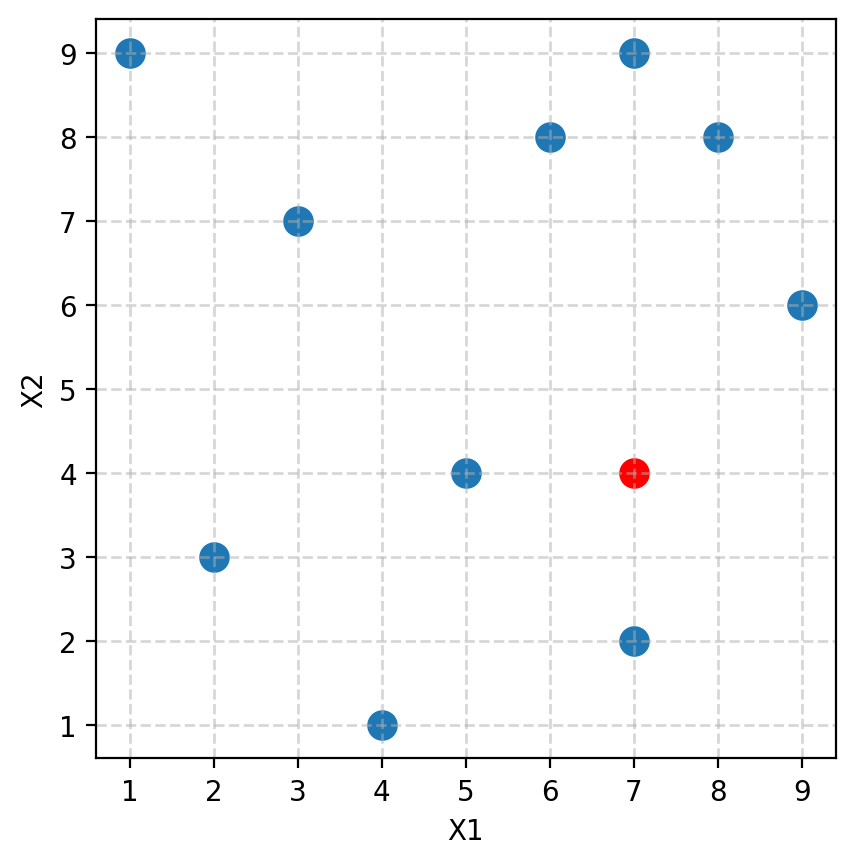

In [5]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    

plot_dataset()

In [6]:
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

X[indices], distances

(array([[[5, 4],
         [7, 2]]]),
 array([[2., 2.]]))

In [7]:
def pairwise_dist(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

In [8]:
def distance_vector_(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    n, d = X.shape
    distances = np.zeros(n)
    for i in range(n):
        distances[i] = pairwise_dist(X[i], query_pt)
    #output the nearest point
    minimum_distance = np.min(distances)
    min_array = []
    for i in range(n):
        if distances[i] == minimum_distance:
            min_array.append(X[i])
    return min_array, sorted(distances)

In [22]:
def distance_vector(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    # Calculate distances using vectorized operations
    distances = np.linalg.norm(X - query_pt, axis=1)
    
    # Find minimum distance and corresponding points
    min_distance = np.min(distances)
    min_indices = np.where(distances == min_distance)[0]
    min_points = X[min_indices]
    
    return min_points, distances

In [23]:
# Test that the function is correct by comparing to sklearn
min_array, distances_naive = distance_vector(X, query_pt)
print(min_array)
print(type(min_array))

[[5 4]
 [7 2]]
<class 'numpy.ndarray'>


In [27]:
# Find all distances from query_pt to all points in X using sklearn
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn == np.sort(distances_naive))

[[ True  True  True  True  True  True  True  True  True  True]]


# Naive KNN

In [60]:
def naive_KNN(X: np.ndarray, query_pt: np.ndarray, k = 1, Y = None):

    '''
    X is training data                           : (n,d)
    query_pt is new point from test data         : (d,)
    Y stores the class values corresponding to X : (n,)  : for classification (optional)
    k is the number of nearest neighbors to consider
    '''

    if query_pt.ndim == 1:
        query_pt = query_pt.reshape(1, -1)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    assert X.shape[1] == query_pt.shape[0] and X.shape[0] == Y.shape[0]

    distances = np.linalg.norm(X - query_pt, axis=1)

    sorted_indices = np.argsort(distances)
    # print(sorted_indices)
    k_nearest = sorted_indices[:k]
    # print(k_nearest)

    if Y is not None:
        k_nearest_classes = Y[k_nearest]
        counts = np.bincount(k_nearest_classes)
        predicted_class = np.argmax(counts)
        return k_nearest, X[k_nearest], distances[k_nearest], predicted_class
    else:
        return k_nearest, X[k_nearest], distances[k_nearest]

In [59]:
X = np.array([1,2,3,5,6,7])
Y = np.array([1,0,1,1,0,1])

naive_KNN(X, np.array([4.1]), 2, Y)

[3 2 4 1 5 0]
[3 2]


(array([3, 2], dtype=int64),
 array([[5],
        [3]]),
 array([0.9, 1.1]),
 1)